# ⚠️ Auto-generated Notebook
    
This notebook is automatically compiled from source files in `/workspaces/awesome-matrix/src/examples/13_matrix_basics`.
**Do not edit this file directly** as your changes will be overwritten.

To make changes:
1. Edit the source file `/workspaces/awesome-matrix/src/examples/13_matrix_basics/01_introduction.py` instead
2. Run the compile script to regenerate this notebook

See [COMPILE.md](docs/COMPILE.md) for more information.


# Matrix Basics: Introduction

This notebook introduces the fundamental concepts of matrix operations in PyTorch.
We'll cover:

- Matrix creation methods
- Basic matrix properties
- Indexing and slicing techniques
- Understanding tensor shapes and dimensions

These basics form the foundation for more advanced linear algebra operations.


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default figure size
plt.rcParams["figure.figsize"] = (10, 8)


## Creating Matrices in PyTorch

PyTorch provides several ways to create tensors (matrices). Let's explore some common methods:


In [2]:
# Create a matrix of zeros
zeros_matrix = torch.zeros(3, 4)
print("Matrix of zeros:")
print(zeros_matrix)

# Create a matrix of ones
ones_matrix = torch.ones(2, 5)
print("\nMatrix of ones:")
print(ones_matrix)

# Create identity matrix
identity_matrix = torch.eye(4)
print("\nIdentity matrix:")
print(identity_matrix)

# Create a diagonal matrix
diagonal_matrix = torch.diag(torch.tensor([1, 2, 3, 4]))
print("\nDiagonal matrix:")
print(diagonal_matrix)

# Create a random matrix
random_matrix = torch.rand(3, 3)
print("\nRandom matrix (uniform distribution [0,1]):")
print(random_matrix)

# Create a random matrix from normal distribution
normal_matrix = torch.randn(3, 3)
print("\nRandom matrix (standard normal distribution):")
print(normal_matrix)

# Create a matrix with specific values
specific_matrix = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("\nMatrix with specific values:")
print(specific_matrix)


Matrix of zeros:
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

Matrix of ones:
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

Identity matrix:
tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

Diagonal matrix:
tensor([[1, 0, 0, 0],
        [0, 2, 0, 0],
        [0, 0, 3, 0],
        [0, 0, 0, 4]])

Random matrix (uniform distribution [0,1]):
tensor([[0.7226, 0.1292, 0.7316],
        [0.2078, 0.2374, 0.0721],
        [0.9532, 0.3408, 0.3048]])

Random matrix (standard normal distribution):
tensor([[ 0.1412, -0.9741, -0.1367],
        [ 0.1746,  0.1286,  1.8338],
        [-0.0951,  0.2783, -0.7493]])

Matrix with specific values:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


## Visualizing Matrices

Let's visualize these matrices to better understand their structures:


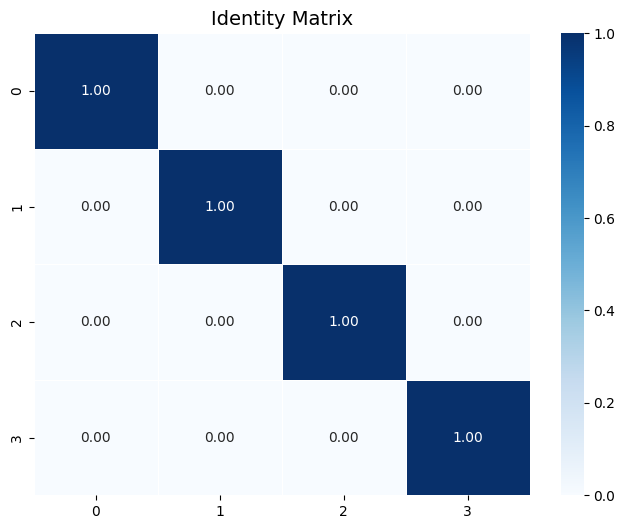

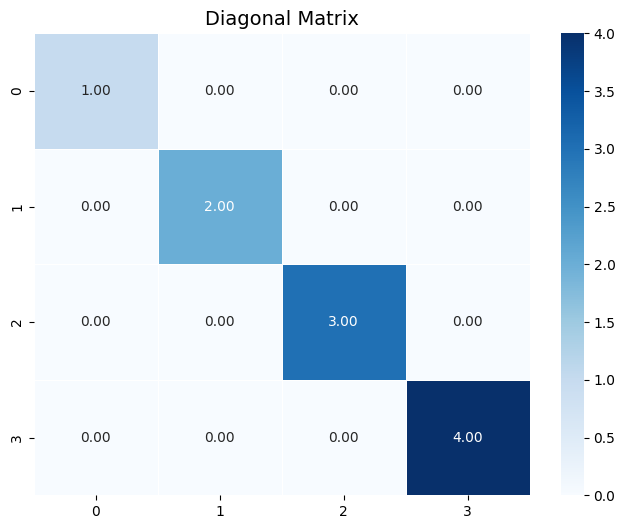

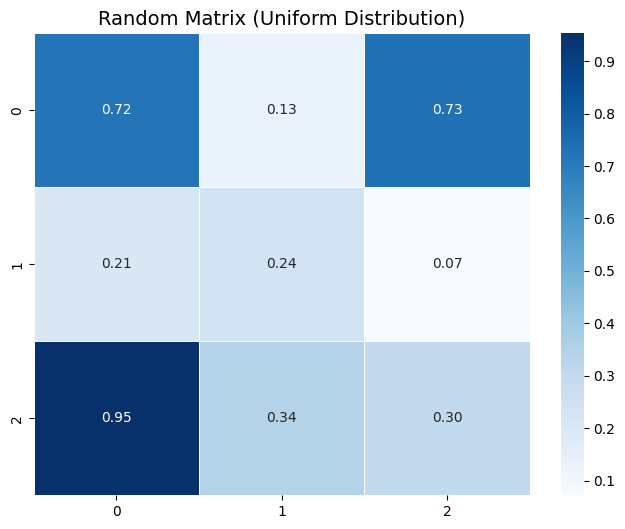

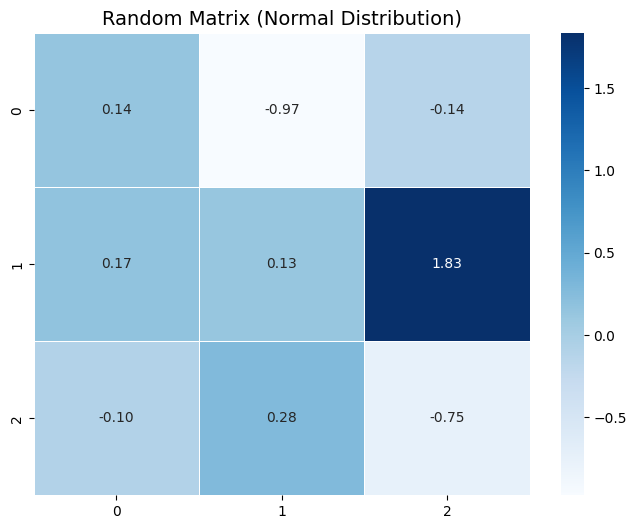

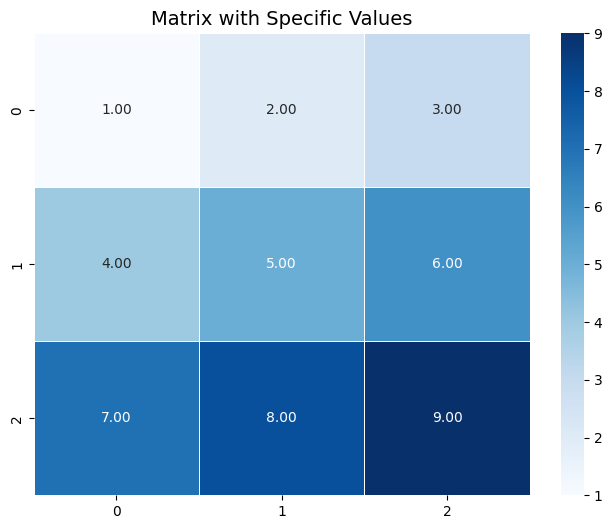

In [3]:
def visualize_matrix(matrix, title):
    """Visualize a matrix as a heatmap with annotations."""
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(matrix.numpy(), annot=True, fmt=".2f", cmap="Blues", 
                    linewidths=0.5, cbar=True)
    ax.set_title(title, fontsize=14)
    plt.show()

# Visualize some of our matrices
visualize_matrix(identity_matrix, "Identity Matrix")
visualize_matrix(diagonal_matrix, "Diagonal Matrix")
visualize_matrix(random_matrix, "Random Matrix (Uniform Distribution)")
visualize_matrix(normal_matrix, "Random Matrix (Normal Distribution)")
visualize_matrix(specific_matrix, "Matrix with Specific Values")


## Basic Matrix Properties

Let's examine some basic properties of matrices in PyTorch:


In [4]:
# Using our specific_matrix: [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

# Shape (dimensions)
print(f"Matrix shape: {specific_matrix.shape}")

# Size (total number of elements)
print(f"Matrix size (total elements): {specific_matrix.numel()}")

# Data type
print(f"Data type: {specific_matrix.dtype}")

# Device (CPU/GPU)
print(f"Device: {specific_matrix.device}")


Matrix shape: torch.Size([3, 3])
Matrix size (total elements): 9
Data type: torch.int64
Device: cpu


## Matrix Indexing and Slicing

PyTorch provides powerful indexing and slicing capabilities for matrices:


In [5]:
matrix = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

print("Original matrix:")
print(matrix)

# Access a single element (row 1, column 2) - zero-indexed
print(f"\nElement at position (1, 2): {matrix[1, 2]}")

# Get an entire row (row 0)
print(f"\nFirst row: {matrix[0]}")

# Get an entire column (column 1)
print(f"\nSecond column: {matrix[:, 1]}")

# Slicing - get a submatrix (rows 0-1, columns 1-3)
submatrix = matrix[0:2, 1:3]
print(f"\nSubmatrix (rows 0-1, columns 1-3):\n{submatrix}")

# Advanced indexing - get specific elements
indices = torch.tensor([0, 2])  # Select rows 0 and 2
print(f"\nRows 0 and 2:\n{matrix[indices]}")


Original matrix:
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

Element at position (1, 2): 7

First row: tensor([1, 2, 3, 4])

Second column: tensor([ 2,  6, 10])

Submatrix (rows 0-1, columns 1-3):
tensor([[2, 3],
        [6, 7]])

Rows 0 and 2:
tensor([[ 1,  2,  3,  4],
        [ 9, 10, 11, 12]])


Let's visualize some of these slicing operations to better understand them:


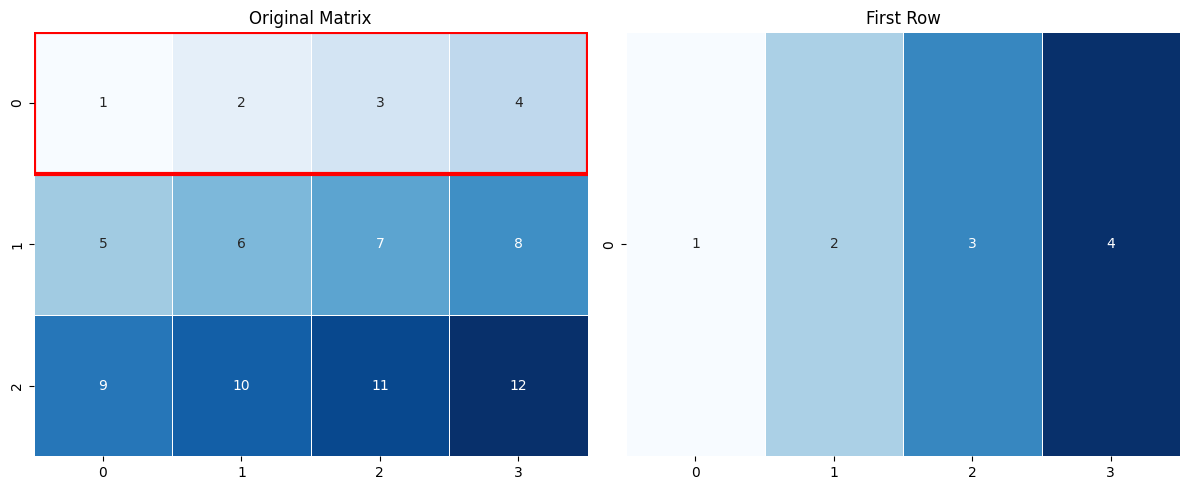

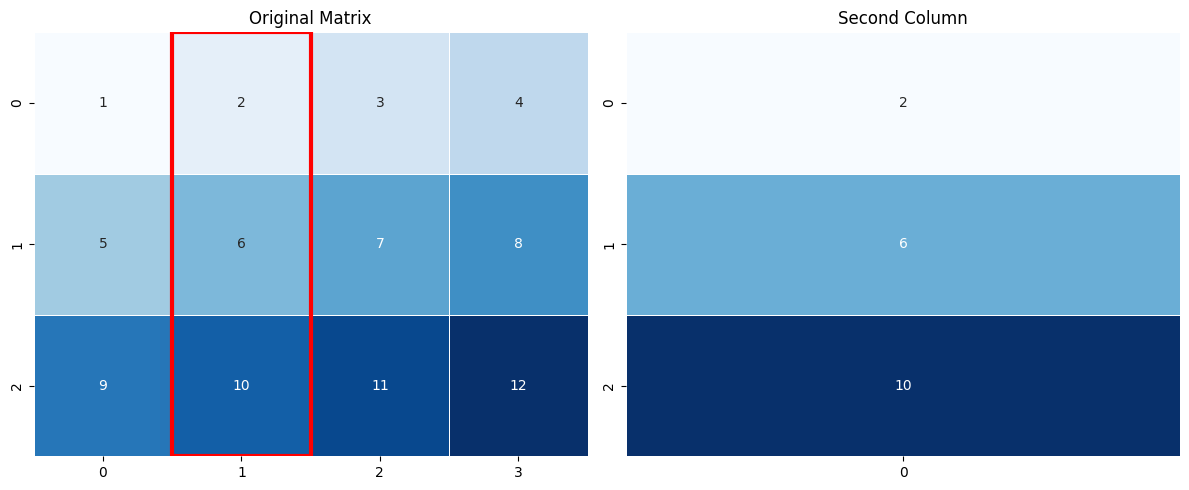

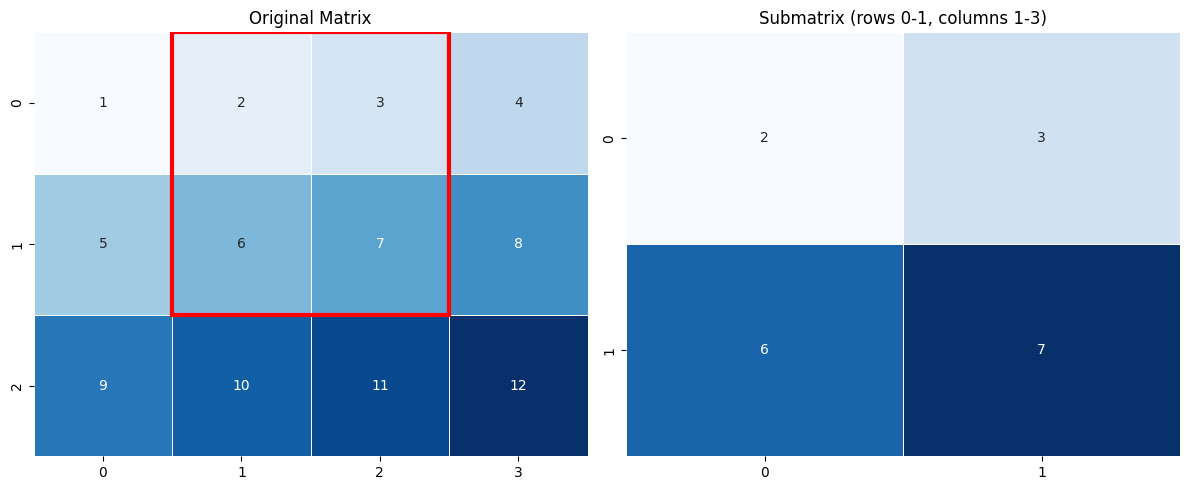

In [6]:
def visualize_slicing(original, sliced, title, highlight_indices=None):
    """Visualize matrix slicing with highlighted regions."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Original matrix with highlighted region
    sns.heatmap(original.numpy(), annot=True, fmt="d", cmap="Blues", 
               linewidths=0.5, ax=axes[0], cbar=False)
    axes[0].set_title("Original Matrix", fontsize=12)
    
    # If there are highlight indices, add a rectangle
    if highlight_indices:
        row_start, row_end, col_start, col_end = highlight_indices
        # Add a rectangle patch
        width = col_end - col_start
        height = row_end - row_start
        import matplotlib.patches as patches
        rect = patches.Rectangle((col_start, row_start), width, height, 
                               linewidth=3, edgecolor='red', facecolor='none')
        axes[0].add_patch(rect)
    
    # Sliced matrix
    sns.heatmap(sliced.numpy(), annot=True, fmt="d", cmap="Blues", 
               linewidths=0.5, ax=axes[1], cbar=False)
    axes[1].set_title(title, fontsize=12)
    
    plt.tight_layout()
    plt.show()

# Visualize row slicing
visualize_slicing(matrix, matrix[0].reshape(1, -1), "First Row", highlight_indices=(0, 1, 0, 4))

# Visualize column slicing
visualize_slicing(matrix, matrix[:, 1].reshape(-1, 1), "Second Column", highlight_indices=(0, 3, 1, 2))

# Visualize submatrix slicing
visualize_slicing(matrix, submatrix, "Submatrix (rows 0-1, columns 1-3)", 
                 highlight_indices=(0, 2, 1, 3))


## Boolean Indexing and Masking

We can also use boolean conditions to select elements from a matrix:


In [7]:
matrix = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

# Create a boolean mask
mask = matrix > 5
print("Boolean mask (elements > 5):")
print(mask)

# Select elements using the mask
selected = matrix[mask]
print("\nSelected elements (elements > 5):")
print(selected)

# We can also apply the condition directly
print("\nElements > 7:")
print(matrix[matrix > 7])

# Replace values based on a condition
matrix_modified = matrix.clone()
matrix_modified[matrix_modified > 6] = 0
print("\nMatrix with elements > 6 replaced with 0:")
print(matrix_modified)


Boolean mask (elements > 5):
tensor([[False, False, False, False],
        [False,  True,  True,  True],
        [ True,  True,  True,  True]])

Selected elements (elements > 5):
tensor([ 6,  7,  8,  9, 10, 11, 12])

Elements > 7:
tensor([ 8,  9, 10, 11, 12])

Matrix with elements > 6 replaced with 0:
tensor([[1, 2, 3, 4],
        [5, 6, 0, 0],
        [0, 0, 0, 0]])


## Visualizing Boolean Masking


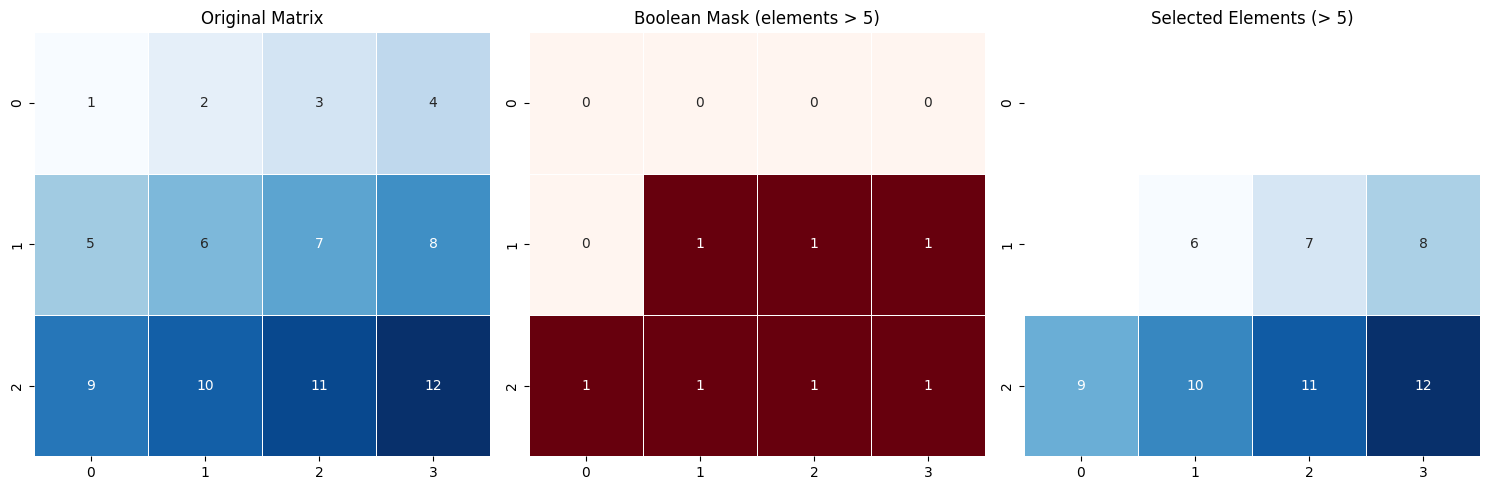

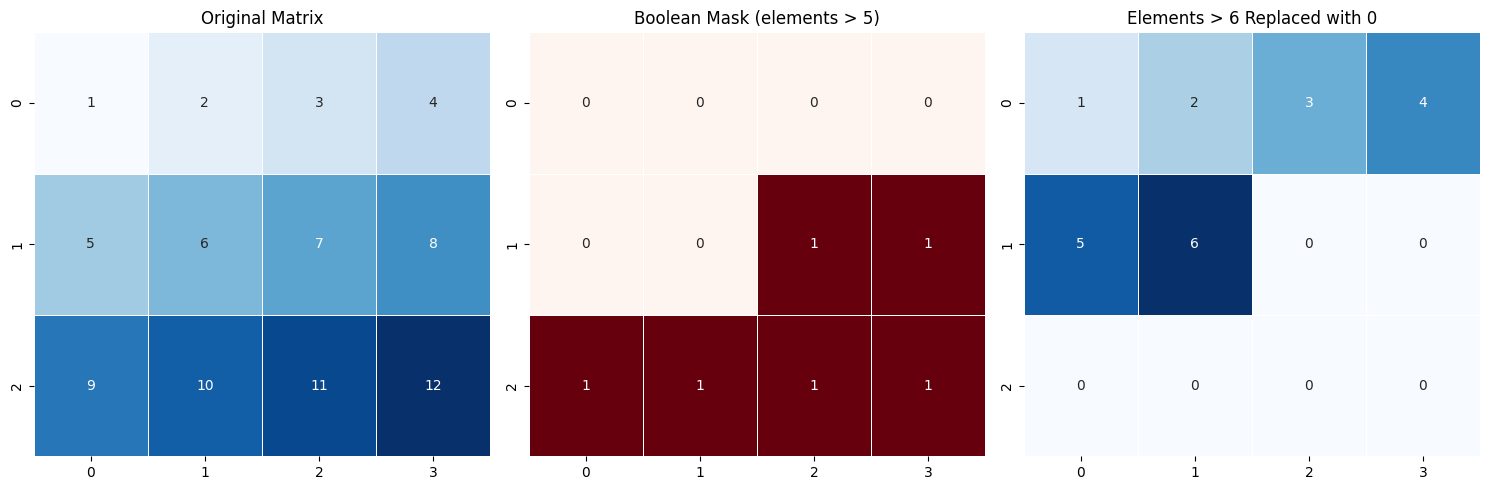

In [8]:
def visualize_boolean_mask(matrix, mask, result, title):
    """Visualize boolean masking operation."""
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Original matrix
    sns.heatmap(matrix.numpy(), annot=True, fmt="d", cmap="Blues", 
               linewidths=0.5, ax=axes[0], cbar=False)
    axes[0].set_title("Original Matrix", fontsize=12)
    
    # Mask (True/False)
    mask_arr = mask.numpy().astype(int)  # Convert boolean to int for visualization
    sns.heatmap(mask_arr, annot=True, fmt="d", cmap="Reds", 
               linewidths=0.5, ax=axes[1], cbar=False)
    axes[1].set_title("Boolean Mask (elements > 5)", fontsize=12)
    
    # Result matrix
    if len(result.shape) == 1:
        # If the result is a 1D tensor, reshape for visualization
        result_vis = torch.zeros_like(matrix)
        result_vis[mask] = result
        
        # Create a mask array for seaborn where True means "don't show this cell"
        mask_for_vis = (~mask).numpy()
        
        sns.heatmap(result_vis.numpy(), annot=True, fmt="d", cmap="Blues", 
                   linewidths=0.5, ax=axes[2], cbar=False, mask=mask_for_vis)
        axes[2].set_title(title, fontsize=12)
    else:
        # For modified matrices
        sns.heatmap(result.numpy(), annot=True, fmt="d", cmap="Blues", 
                   linewidths=0.5, ax=axes[2], cbar=False)
        axes[2].set_title(title, fontsize=12)
    
    plt.tight_layout()
    plt.show()

# Visualize the masking operation
visualize_boolean_mask(matrix, mask, selected, "Selected Elements (> 5)")

# Visualize the replacement operation
visualize_boolean_mask(matrix, matrix > 6, matrix_modified, "Elements > 6 Replaced with 0")


## Conclusion

In this notebook, we've explored the basics of matrix operations in PyTorch:

- Different ways to create matrices
- Accessing basic matrix properties
- Various methods for indexing and slicing matrices
- Boolean indexing for conditional selection

These fundamental operations form the building blocks for more advanced linear algebra and tensor manipulations. In the next notebooks, we'll explore shape manipulation and memory layout considerations.